<a href="https://colab.research.google.com/github/CanardSteak/applied/blob/main/NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing </a>

## Assignment: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset.

#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [13]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)
train_df.head()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


#### __Test data:__

In [14]:
import pandas as pd

test_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_test.csv', header=0)
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations we covered in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [15]:
# Implement this
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop = stopwords.words('english') #initialize a list of stop words in english

# here the list with the words we want to keep in the sentence
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# new stop words list
stop_words = [word for word in stop if word not in excluding]
#time to simplifie words from the list with stemmer method
snow = SnowballStemmer('english')

def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ""

        filtered_sentence=[]

        sent = sent.lower() # Lowercase
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:

        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(final_string)

    return final_text_list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [16]:
# Implement this

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import gensim
from gensim.models import Word2Vec

print("Processing the reviewText fields")
train_text_list = process_text(train_df["text"].tolist())
print(len(train_text_list))
val_text_list = process_text(test_df["text"].tolist())

y_train = train_df["label"].tolist()
y_test = test_df["label"].tolist()


Processing the reviewText fields
25000


In [51]:
## PIPELINE ###
##########################
w2v = gensim.models.Word2Vec()
pipeline = Pipeline([
    ('text_vect', CountVectorizer(binary=True,
    #( 'text_vect', TfidfVectorizer(use_idf=True,
                                  max_features=100)),
    ('knn', KNeighborsClassifier(7))
                                ])


# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline


Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=100)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [52]:
# We using lists of processed text fields
X_train = train_text_list
X_val = val_text_list

print(len(X_train))
print(len(y_train))
# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

25000
25000


Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=100)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset
val_predictions = pipeline.predict(X_val)
print(confusion_matrix(y_test, val_predictions))
print(classification_report(y_test, val_predictions))
print("Accuracy (validation):", accuracy_score(y_test, val_predictions))

[[8038 4462]
 [4190 8310]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65     12500
           1       0.65      0.66      0.66     12500

    accuracy                           0.65     25000
   macro avg       0.65      0.65      0.65     25000
weighted avg       0.65      0.65      0.65     25000

Accuracy (validation): 0.65392


Let's try with the numbers of max_features = 5 and binary = true and KNN = 5:

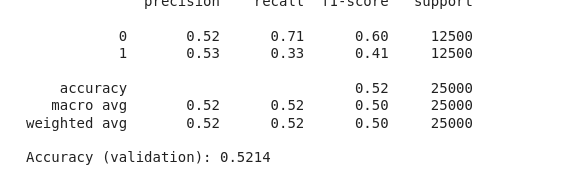

we have accuracy = 0.52


Now, let's try with 10 features and the binary = true and KNN = 5:

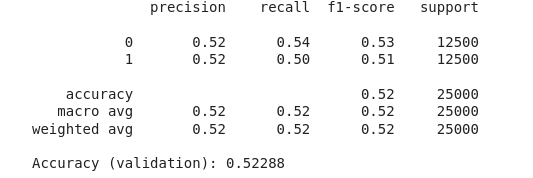

As we can see, the accuracy it still barely the same but increased a little bit.



Now, 50 max_features but binary true and KNN = 5:

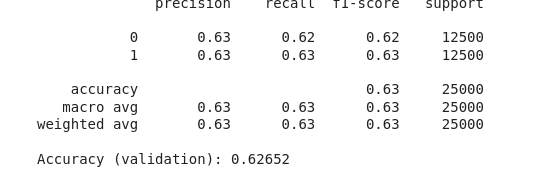

As we can see, with 50 max_features, the accuracy increased to 0.63



For the last test with binary true and 100 max_features and KNN = 5:    

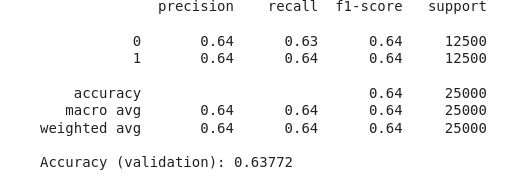

We can see the accuracy increased from 0.63 to 0.64 with the max features from 50 to 100

Now, KNN = 3, binary = True and 5 features :    

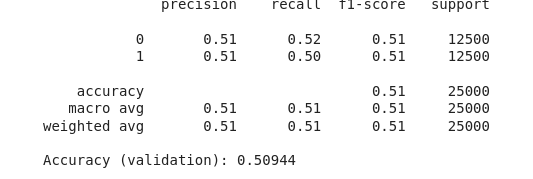

With KNN = 3, our accuracy is 0.51 compare to KNN = 5 where accuracy was 0.52

For features = 10, binary 10 and KNN = 3 :     

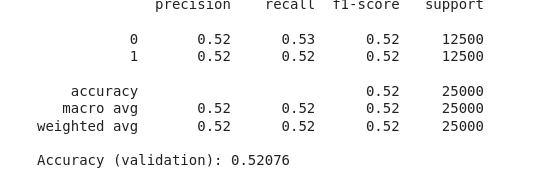

The accuracy is = 0.52

Binary False, KNN = 3, 50 max_features :     

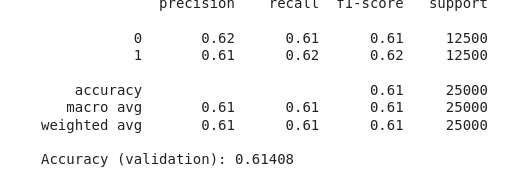

The accuracy is = 0.61

KNN = 3, binary False and 100 max_features :     

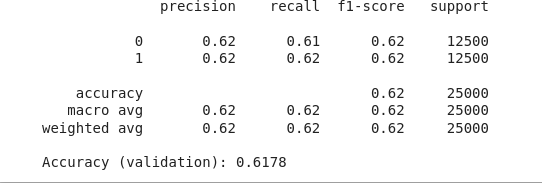

the accuracy is = 0.61

KNN = 7, binary = true and max_features = 5 :     

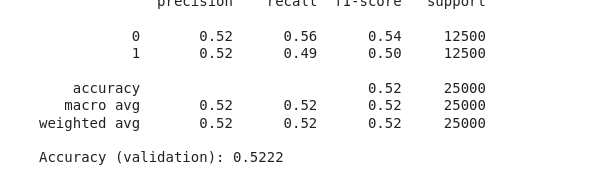

The accuracy = 0.52


KNN = 7, 10 max_features and binary False :     

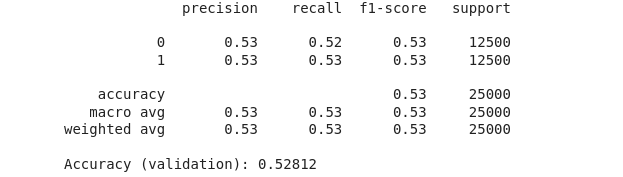

the accuracy = 0.53

Binary True, KNN = 7, 50 max_features :     

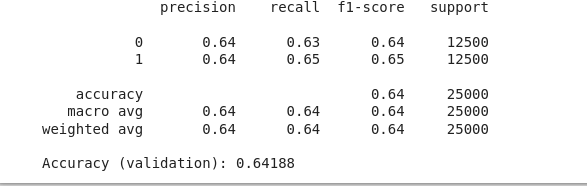

the accuracy = 0.64

Binary = True, KNN = 7, max_features = 100 :     

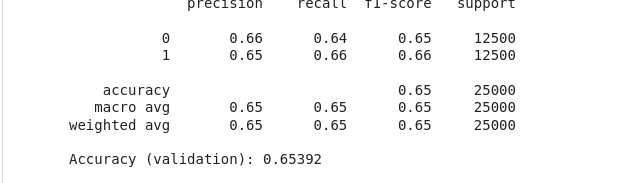

accuracy = 0.65